# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codes as cd
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr
import sklearn as sk
import statsmodels.formula.api as sm
import math
# Libraries for data preparation and model building
from scipy import stats
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from statsmodels.graphics.correlation import plot_corr
from statsmodels.formula.api import ols


# create one or more ML models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
lg = linear_model.LogisticRegression(solver='lbfgs', max_iter=100)

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_1 = pd.read_csv('df_train.csv') # load the train data
df_2 = pd.read_csv('df_test.csv') # load the test data

> Make a copy of the dataset

In [4]:
df_train = df_1.copy() # Copy of the train data
df_test = df_2.copy() # Copy of the test data

<a id="three"></a>
## 3. Programmatic Assessment of Train Data Set
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Assess the Train data set for tidiness and dirtiness issues ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth assessment of all the variables in the DataFrame. |

---


In [5]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
df_train.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,...,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [7]:
df_train.shape

(8763, 49)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [9]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [10]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

<a id="three"></a>
## 4. Programmatic Assessment of Test Data Set
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Assess the Test data set for tidiness and dirtiness issues ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth assessment of all the variables in the DataFrame. |

---


In [13]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [14]:
df_test.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333


In [15]:
df_test.shape

(2920, 48)

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [17]:
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [18]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [19]:
df_test.duplicated().sum()

0

> ** NOTES FROM ASSESSMENTS OF THE TRAIN DATA SET**
>1. Time columns has a wrong data type (Object instead of Date Time)
>2. Rename all columns to lower case
>3. Drop the unnamed column since it corresponds with the index
>4. Valencia pressure column has Null values.
>5. Reformat barcelona pressure column numbers to show exponents
>6. Irrelevant 'unnamed' column which is the same with index.
>7. Every feature that is wind degree should be categorical data with values ranging from 0 to 360 and category levels 1 to 10.
>8. Assessment indicates the presence of an anomaly with the rainfall levels of barcelona in the train dataset. (high rainfall level and there wasn't any rain that day as determined from online records) 
>9. Assessment indicates the presence of an anomaly with the windspeed for valencia.(max speed 52 is too high, other cities had a maximum wind speed of 12, normal windspeed levels fall between the ranges of 10 to 19 on average)
>10. There are no percentiles for rain_1h
>11. There are no percentiles for rain_3h

### split the data according to variables measured to compare all records

In [20]:
wind_speed_train = df_train[[x for x in df_train.columns if 'wind_speed' in x]]

In [21]:
wind_speed_train

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
0,0.666667,0.666667,1.000000,6.333333,3.333333
1,0.333333,1.666667,1.000000,4.000000,3.333333
2,1.000000,1.000000,1.000000,2.000000,2.666667
3,1.000000,1.000000,1.000000,2.333333,4.000000
4,1.000000,1.000000,0.333333,4.333333,3.000000
...,...,...,...,...,...
8758,1.000000,2.666667,4.333333,1.666667,1.000000
8759,5.000000,2.000000,8.000000,3.000000,1.666667
8760,6.333333,7.333333,8.333333,5.333333,3.666667
8761,7.333333,7.333333,2.666667,5.333333,4.333333


In [22]:
wind_speed_train.describe()

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,2.586272,1.850356,2.870497,2.425045
std,1.850371,2.411190,1.695888,1.792197,1.672895
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.666667,1.666667,1.000000
50%,2.000000,1.666667,1.000000,2.666667,2.000000
75%,3.333333,3.666667,2.666667,4.000000,3.333333
max,13.000000,52.000000,12.666667,12.666667,11.666667


In [23]:
wind_speed_test = df_test[[x for x in df_test.columns if 'wind_speed' in x]]

In [24]:
wind_speed_test

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
0,5.000000,5.000000,3.000000,4.000000,1.000000
1,4.666667,5.333333,3.666667,4.666667,0.666667
2,2.333333,5.000000,2.333333,4.000000,0.666667
3,2.666667,5.333333,5.666667,2.333333,1.333333
4,4.000000,8.666667,10.666667,4.666667,1.000000
...,...,...,...,...,...
2915,0.333333,2.000000,1.333333,6.333333,2.000000
2916,0.333333,1.333333,1.000000,2.666667,4.000000
2917,1.000000,3.000000,0.666667,2.666667,4.666667
2918,1.000000,2.000000,0.666667,2.333333,3.333333


In [25]:
wind_speed_test.describe()

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,2.457820,3.012785,2.283562,2.518094,2.657192
std,1.774838,1.996340,1.654787,1.625507,1.788870
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.333333,1.666667,1.000000,1.333333,1.333333
50%,2.000000,2.333333,1.666667,2.000000,2.333333
75%,3.333333,4.000000,3.333333,3.666667,3.666667
max,13.333333,14.333333,10.666667,12.666667,12.666667


In [26]:
wind_degree_train = df_train[[x for x in df_train.columns if 'wind_deg' in x]]

In [27]:
wind_degree_train

,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
0,level_5,223.333333,42.666667
1,level_10,221.000000,139.000000
2,level_9,214.333333,326.000000
3,level_8,199.666667,273.000000
4,level_7,185.000000,260.000000
...,...,...,...
8758,level_6,226.666667,83.666667
8759,level_6,220.000000,213.333333
8760,level_9,283.333333,256.666667
8761,level_8,220.000000,250.000000


In [28]:
wind_degree_train.describe()

,Bilbao_wind_deg,Barcelona_wind_deg
count,8763.000000,8763.000000
mean,158.957511,190.544848
std,102.056299,89.077337
min,0.000000,0.000000
25%,73.333333,118.166667
50%,147.000000,200.000000
75%,234.000000,260.000000
max,359.333333,360.000000


In [29]:
wind_degree_test = df_test[[x for x in df_test.columns if 'wind_deg' in x]]

In [30]:
wind_degree_test

,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
0,level_8,193.333333,176.666667
1,level_8,143.333333,266.666667
2,level_7,130.000000,263.333333
3,level_7,196.666667,86.666667
4,level_7,233.333333,283.333333
...,...,...,...
2915,level_9,70.000000,320.000000
2916,level_8,36.666667,293.333333
2917,level_6,14.666667,233.333333
2918,level_6,19.000000,253.333333


In [31]:
wind_degree_test.describe()

,Bilbao_wind_deg,Barcelona_wind_deg
count,2920.000000,2920.000000
mean,162.643836,178.979452
std,97.749873,86.976503
min,0.000000,0.000000
25%,86.666667,113.333333
50%,140.000000,176.666667
75%,233.333333,253.333333
max,360.000000,343.333333


In [32]:
rain_1h_train = df_train[[x for x in df_train.columns if 'rain_1h' in x]]

In [33]:
rain_1h_train

,Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
8758,0.0,0.0,0.0,0.0
8759,0.0,0.0,0.0,0.0
8760,0.4,0.0,0.0,0.1
8761,0.2,0.0,0.0,0.3


In [34]:
rain_1h_train.describe()

,Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h
count,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.135753,0.128906,0.039439,0.037818
std,0.374901,0.634730,0.175857,0.152639
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.100000,0.000000,0.000000,0.000000
max,3.000000,12.000000,3.000000,3.000000


In [35]:
rain_1h_train[rain_1h_train['Barcelona_rain_1h'] > 11.00000]

,Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h
256,0.3,12.0,0.0,0.5
2147,0.0,12.0,0.0,0.0
4212,0.0,12.0,0.0,0.0


In [36]:
df_train.loc[df_train['Barcelona_rain_1h']> 11]

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
256,256,2015-02-02 15:00:00,6.666667,level_8,0.3,6.666667,74.666667,97.666667,79.000000,1.666667,...,279.040667,283.136667,279.554062,279.554062,283.136667,279.554062,286.566333,279.040667,279.040667,11872.000000
2147,2147,2015-09-27 00:00:00,3.000000,level_1,0.0,0.666667,59.000000,30.666667,40.000000,0.000000,...,294.150000,291.060000,285.150000,286.936667,286.483333,288.336667,293.816667,293.480000,292.816667,13284.000000
4212,4212,2016-06-11 03:00:00,0.333333,level_8,0.0,0.333333,42.000000,58.666667,85.333333,0.666667,...,293.103333,293.036667,286.113333,287.676667,289.820000,289.260000,294.205333,293.023333,292.946667,4810.666667


In [37]:
rain_1h_test = df_test[[x for x in df_test.columns if 'rain_1h' in x]]

In [38]:
rain_1h_test

,Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
2915,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,0.0
2917,0.0,0.0,0.0,0.0
2918,0.0,0.0,0.0,0.0


In [39]:
rain_1h_test.describe()

,Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h
count,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.067517,0.047397,0.046164,0.059863
std,0.153381,0.162474,0.193432,0.193218
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.600000,2.300000,2.300000,3.000000


In [40]:
rain_3h_train = df_train[[x for x in df_train.columns if 'rain_3h' in x]]

In [41]:
rain_3h_train

,Seville_rain_3h,Barcelona_rain_3h
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8758,0.0,0.0
8759,0.0,0.0
8760,0.0,0.0
8761,0.0,0.0


In [42]:
rain_3h_train.describe()

,Seville_rain_3h,Barcelona_rain_3h
count,8763.000000,8763.000000
mean,0.000243,0.000439
std,0.003660,0.003994
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,0.093333,0.093000


In [43]:
rain_3h_test = df_test[[x for x in df_test.columns if 'rain_3h' in x]]

In [44]:
rain_3h_test

,Seville_rain_3h,Barcelona_rain_3h
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2915,0.0,0.0
2916,0.0,0.0
2917,0.0,0.0
2918,0.0,0.0


In [45]:
humidity_train = df_train[[x for x in df_train.columns if 'humidity' in x]]

In [46]:
humidity_train

,Seville_humidity,Madrid_humidity,Valencia_humidity
0,74.333333,64.000000,75.666667
1,78.333333,64.666667,71.000000
2,71.333333,64.333333,65.666667
3,65.333333,56.333333,54.000000
4,59.000000,57.000000,58.333333
...,...,...,...
8758,89.000000,95.666667,71.333333
8759,82.000000,85.000000,40.333333
8760,67.666667,71.000000,44.666667
8761,67.666667,79.000000,45.000000


In [47]:
humidity_train.describe()

,Seville_humidity,Madrid_humidity,Valencia_humidity
count,8763.000000,8763.000000,8763.000000
mean,62.658793,57.414717,65.247727
std,22.621226,24.335396,19.262322
min,8.333333,6.333333,10.333333
25%,44.333333,36.333333,51.333333
50%,65.666667,58.000000,67.000000
75%,82.000000,78.666667,81.333333
max,100.000000,100.000000,100.000000


In [48]:
humidity_test = df_test[[x for x in df_test.columns if 'humidity' in x]]

In [49]:
humidity_test

,Seville_humidity,Madrid_humidity,Valencia_humidity
0,87.000000,71.333333,46.333333
1,89.000000,78.000000,53.666667
2,89.000000,89.666667,42.000000
3,93.333333,82.666667,45.000000
4,65.333333,64.000000,41.000000
...,...,...,...
2915,81.666667,49.666667,69.666667
2916,61.000000,28.333333,32.000000
2917,47.000000,26.333333,23.666667
2918,52.666667,56.666667,59.000000


In [50]:
humidity_test.describe()

,Seville_humidity,Madrid_humidity,Valencia_humidity
count,2920.000000,2920.000000,2920.000000
mean,67.123516,62.644463,64.623916
std,20.611292,24.138393,18.355766
min,11.666667,8.000000,13.000000
25%,52.000000,43.000000,52.000000
50%,70.333333,63.000000,65.000000
75%,85.000000,84.000000,79.333333
max,100.000000,100.000000,100.000000


In [51]:
clouds_all_train = df_train[[x for x in df_train.columns if 'clouds_all' in x]]

In [52]:
clouds_all_train

,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,2.000000,0.000000,0.000000
...,...,...,...
8758,56.666667,80.000000,45.000000
8759,26.666667,75.000000,85.000000
8760,63.333333,33.333333,85.000000
8761,63.333333,51.666667,56.666667


In [53]:
clouds_all_train.describe()

,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all
count,8763.000000,8763.000000,8763.000000
mean,43.469132,13.714748,19.473392
std,32.551044,24.272482,28.053660
min,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000
75%,75.000000,20.000000,33.333333
max,100.000000,97.333333,100.000000


In [54]:
clouds_all_train['Seville_clouds_all'].value_counts()

0.000000     5534
20.000000     268
6.666667      253
13.333333     208
75.000000     148
             ... 
7.000000        1
20.333333       1
55.333333       1
10.333333       1
64.666667       1
Name: Seville_clouds_all, Length: 246, dtype: int64

In [55]:
clouds_all_test = df_test[[x for x in df_test.columns if 'clouds_all' in x]]

In [56]:
clouds_all_test

,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all
0,20.000000,0.000000,0.0
1,0.000000,0.000000,0.0
2,0.000000,6.666667,0.0
3,26.666667,6.666667,0.0
4,26.666667,0.000000,0.0
...,...,...,...
2915,80.000000,0.000000,0.0
2916,56.666667,0.000000,0.0
2917,0.000000,0.000000,0.0
2918,0.000000,0.000000,0.0


In [57]:
clouds_all_test.describe()

,Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all
count,2920.000000,2920.000000,2920.000000
mean,43.355422,15.477283,24.255822
std,30.486298,25.289197,29.430257
min,0.000000,0.000000,0.000000
25%,13.333333,0.000000,0.000000
50%,45.000000,0.000000,11.333333
75%,75.000000,20.000000,40.000000
max,97.333333,93.333333,92.000000


In [58]:
pressure_train = df_train[[x for x in df_train.columns if 'pressure' in x]]

In [59]:
pressure_train

,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
0,sp25,1036.333333,1035.000000,1002.666667,971.333333
1,sp25,1037.333333,1035.666667,1004.333333,972.666667
2,sp25,1038.000000,1036.000000,1005.333333,974.000000
3,sp25,1037.000000,1036.000000,1009.000000,994.666667
4,sp25,1035.000000,1035.333333,NaN,1035.333333
...,...,...,...,...,...
8758,sp23,1021.000000,1017.666667,NaN,1024.000000
8759,sp23,1019.000000,1015.333333,1021.000000,1023.666667
8760,sp22,1015.666667,1017.333333,1009.666667,1021.666667
8761,sp23,1015.000000,1020.333333,1020.000000,1023.000000


In [60]:
pressure_train.describe()

,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
count,8.763000e+03,8763.000000,6695.000000,8763.000000
mean,1.377965e+03,1017.739549,1012.051407,1010.316920
std,1.407314e+04,10.046124,9.506214,22.198555
min,6.706667e+02,971.333333,972.666667,927.666667
25%,1.014000e+03,1013.000000,1010.333333,1012.333333
50%,1.018000e+03,1019.000000,1015.000000,1017.333333
75%,1.022000e+03,1024.000000,1018.000000,1022.000000
max,1.001411e+06,1042.000000,1021.666667,1038.000000


In [61]:
pressure_train.value_counts()

Seville_pressure  Barcelona_pressure  Bilbao_pressure  Valencia_pressure  Madrid_pressure
sp21              1024.000000         986.000000       992.000000         959.000000         14
sp25              1038.000000         1002.000000      1004.000000        971.000000          3
sp5               1017.000000         1023.000000      1017.000000        1015.666667         2
sp22              1030.000000         999.000000       997.000000         965.000000          2
sp25              1024.000000         995.000000       992.000000         962.000000          2
                                                                                             ..
sp16              1017.000000         1011.000000      1018.333333        1020.000000         1
                                      987.000000       984.666667         954.000000          1
                                      982.000000       982.000000         951.000000          1
                  1016.666667         1027.333

In [62]:
pressure_train['Seville_pressure'].value_counts()

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp22    392
sp16    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64

In [63]:
pressure_test = df_test[[x for x in df_test.columns if 'pressure' in x]]

In [64]:
pressure_test

,Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
0,sp25,1017.333333,1025.666667,NaN,1030.000000
1,sp25,1020.333333,1026.666667,NaN,1030.333333
2,sp25,1023.000000,1025.333333,NaN,1030.666667
3,sp25,1025.666667,1025.000000,NaN,1032.333333
4,sp25,1026.000000,1022.333333,NaN,1032.333333
...,...,...,...,...,...
2915,sp24,1029.666667,1034.666667,NaN,1031.666667
2916,sp24,1028.666667,1034.333333,NaN,1031.333333
2917,sp23,1027.000000,1033.000000,NaN,1030.000000
2918,sp23,1027.000000,1033.333333,NaN,1030.333333


In [65]:
pressure_test.describe()

,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
count,2920.000000,2920.000000,2466.000000,2920.000000
mean,1015.317123,1016.709132,1013.148351,1016.240411
std,7.021445,8.773784,6.528997,9.624074
min,988.333333,975.000000,973.000000,943.000000
25%,1012.000000,1013.333333,1010.666667,1013.666667
50%,1016.000000,1017.666667,1014.666667,1017.333333
75%,1019.333333,1022.000000,1017.666667,1021.333333
max,1037.000000,1040.000000,1021.666667,1036.000000


In [66]:
snow_3h_train = df_train[[x for x in df_train.columns if 'snow_3h' in x]]

In [67]:
snow_3h_train

,Bilbao_snow_3h,Valencia_snow_3h
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8758,0.0,0.0
8759,0.0,0.0
8760,0.0,0.0
8761,0.0,0.0


In [68]:
snow_3h_train.describe()

,Bilbao_snow_3h,Valencia_snow_3h
count,8763.000000,8763.000000
mean,0.031912,0.000205
std,0.557264,0.011866
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,21.300000,0.791667


In [69]:
snow_3h_train['Bilbao_snow_3h'].value_counts()

0.000000    8666
2.700000       4
1.500000       4
0.043000       4
0.233333       3
            ... 
2.883333       1
6.958333       1
4.666667       1
1.208333       1
6.533333       1
Name: Bilbao_snow_3h, Length: 83, dtype: int64

In [70]:
df_train[df_train['Bilbao_snow_3h'] > 0]['time']
#val_check_snow = df_train[['Valencia_snow_3h', 'time']]

149     2015-01-20 00:00:00
150     2015-01-20 03:00:00
151     2015-01-20 06:00:00
152     2015-01-20 09:00:00
153     2015-01-20 12:00:00
               ...         
3452    2016-03-08 03:00:00
3454    2016-03-08 09:00:00
3456    2016-03-08 15:00:00
3458    2016-03-08 21:00:00
3459    2016-03-09 00:00:00
Name: time, Length: 97, dtype: object

In [71]:
snow_3h_test = df_test[[x for x in df_test.columns if 'snow_3h' in x]]

In [72]:
snow_3h_test

,Bilbao_snow_3h,Valencia_snow_3h
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2915,0,0
2916,0,0
2917,0,0
2918,0,0


In [73]:
snow_3h_test.describe()

,Bilbao_snow_3h,Valencia_snow_3h
count,2920.0,2920.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [74]:
weather_id_train = df_train[[x for x in df_train.columns if 'weather_id' in x]]

In [75]:
weather_id_train

,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id
0,800.000000,800.0,800.000000,800.000000
1,800.000000,800.0,800.000000,800.000000
2,800.000000,800.0,800.000000,800.000000
3,800.000000,800.0,800.000000,800.000000
4,800.000000,800.0,800.000000,800.000000
...,...,...,...,...
8758,727.666667,801.0,769.333333,802.333333
8759,762.000000,801.0,803.000000,801.333333
8760,702.333333,801.0,801.666667,601.000000
8761,500.000000,800.0,802.333333,634.166667


In [76]:
weather_id_train.describe()

,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id
count,8763.000000,8763.000000,8763.000000,8763.000000
mean,773.527594,765.979687,774.658818,724.722362
std,77.313315,88.142235,71.940009,115.846537
min,211.000000,200.666667,200.000000,207.333333
25%,800.000000,800.000000,800.000000,700.333333
50%,800.000000,800.333333,800.000000,800.000000
75%,800.666667,801.000000,800.000000,801.666667
max,804.000000,804.000000,804.000000,804.000000


In [77]:
weather_id_test = df_test[[x for x in df_test.columns if 'weather_id' in x]]

In [78]:
weather_id_test

,Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id
0,800.0,800.000000,800.000000,801.000000
1,800.0,800.333333,800.000000,721.000000
2,800.0,800.000000,800.333333,800.000000
3,800.0,800.000000,800.333333,801.333333
4,800.0,800.333333,800.000000,801.333333
...,...,...,...,...
2915,800.0,800.000000,800.000000,734.333333
2916,800.0,800.000000,800.000000,747.666667
2917,800.0,800.000000,800.000000,800.000000
2918,800.0,800.000000,800.000000,800.000000


In [79]:
temp_max_train = df_train[[x for x in df_train.columns if 'temp_max' in x]]

In [80]:
temp_max_train

,Seville_temp_max,Valencia_temp_max,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_max
0,274.254667,269.888000,281.013000,265.938000,269.338615
1,274.945000,271.728333,280.561667,266.386667,270.376000
2,278.792000,278.008667,281.583667,272.708667,275.027229
3,285.394000,284.899552,283.434104,281.895219,281.135063
4,285.513719,283.015115,284.213167,280.678437,282.252063
...,...,...,...,...,...
8758,285.483333,282.483333,282.150000,280.816667,290.150000
8759,288.483333,291.816667,287.816667,283.483333,291.150000
8760,291.483333,290.706333,290.483333,285.150000,286.816667
8761,291.483333,290.483333,288.150000,283.483333,284.150000


In [81]:
temp_max_test = df_test[[x for x in df_test.columns if 'temp_max' in x]]

In [82]:
temp_max_test

,Seville_temp_max,Valencia_temp_max,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_max
0,284.483333,287.483333,287.816667,280.816667,285.150000
1,282.483333,284.150000,284.816667,280.483333,284.150000
2,280.816667,282.816667,284.483333,276.483333,282.150000
3,281.150000,283.483333,284.150000,277.150000,284.483333
4,287.150000,287.150000,287.483333,281.150000,286.816667
...,...,...,...,...,...
2915,280.816667,279.816667,279.816667,281.483333,276.150000
2916,287.483333,290.816667,286.483333,287.816667,278.816667
2917,290.816667,293.483333,289.483333,288.816667,285.816667
2918,288.816667,286.483333,285.816667,285.150000,282.816667


In [83]:
temp_train = df_train[[x for x in df_train.columns if "temp" in x and 'max' not in x and 'min' not in x]]

In [84]:
temp_train

,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp
0,269.888000,274.254667,281.013000,269.338615,265.938000
1,271.728333,274.945000,280.561667,270.376000,266.386667
2,278.008667,278.792000,281.583667,275.027229,272.708667
3,284.899552,285.394000,283.434104,281.135063,281.895219
4,283.015115,285.513719,284.213167,282.252063,280.678437
...,...,...,...,...,...
8758,282.483333,285.076667,281.276667,287.573333,279.686667
8759,291.816667,287.673333,287.483333,288.616667,282.400000
8760,290.706333,290.070000,289.816667,285.330000,283.956667
8761,290.483333,290.070000,287.523333,281.410000,282.666667


In [85]:
temp_test = df_test[[x for x in df_test.columns if "temp" in x and 'max' not in x and 'min' not in x]]

In [86]:
temp_test

,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp
0,287.483333,283.673333,287.356667,280.380000,279.866667
1,284.150000,281.673333,284.190000,281.010000,279.193333
2,282.816667,280.613333,283.150000,279.196667,276.340000
3,283.483333,279.936667,283.190000,281.740000,275.953333
4,287.150000,285.570000,286.816667,284.116667,280.686667
...,...,...,...,...,...
2915,279.323333,280.210000,278.140000,273.210000,274.910000
2916,290.323333,287.280000,286.150000,278.443333,283.156667
2917,293.483333,290.816667,288.820000,285.073333,287.733333
2918,285.976667,288.300000,284.473333,281.626667,283.813333


In [87]:
temp_min_train = df_train[[x for x in df_train.columns if 'temp_min' in x]]

In [88]:
temp_min_train

,Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min
0,269.888000,269.338615,281.013000,274.254667,265.938000
1,271.728333,270.376000,280.561667,274.945000,266.386667
2,278.008667,275.027229,281.583667,278.792000,272.708667
3,284.899552,281.135063,283.434104,285.394000,281.895219
4,283.015115,282.252063,284.213167,285.513719,280.678437
...,...,...,...,...,...
8758,282.483333,285.150000,280.483333,284.816667,278.483333
8759,291.816667,286.483333,287.150000,287.150000,280.150000
8760,290.706333,283.816667,289.150000,289.150000,281.150000
8761,290.483333,278.816667,286.816667,289.150000,280.816667


In [89]:
temp_min_test = df_test[[x for x in df_test.columns if 'temp_min' in x]]

In [90]:
temp_min_test

,Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min
0,287.483333,276.150000,286.816667,283.150000,279.150000
1,284.150000,277.816667,283.483333,281.150000,278.150000
2,282.816667,276.816667,281.816667,280.483333,276.150000
3,283.483333,279.150000,282.150000,279.150000,274.483333
4,287.150000,281.816667,286.150000,284.483333,280.150000
...,...,...,...,...,...
2915,278.816667,270.816667,276.483333,279.816667,271.150000
2916,289.816667,278.150000,285.816667,287.150000,280.483333
2917,293.483333,284.150000,288.150000,290.816667,286.483333
2918,285.483333,280.150000,283.150000,287.483333,282.150000


In [91]:
temp_test = df_test[[x for x in df_test.columns if 'temp' in x]]

In [92]:
temp_test

,Seville_temp_max,Valencia_temp_max,Valencia_temp,Seville_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,284.483333,287.483333,287.483333,283.673333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,282.483333,284.150000,284.150000,281.673333,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,280.816667,282.816667,282.816667,280.613333,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,281.150000,283.483333,283.483333,279.936667,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,287.150000,287.150000,287.150000,285.570000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,280.816667,279.816667,279.323333,280.210000,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,287.483333,290.816667,290.323333,287.280000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,290.816667,293.483333,293.483333,290.816667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,288.816667,286.483333,285.976667,288.300000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


Summary Statistics

<a id="three"></a>
## 3. Data Cleaning Operations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning and transformation ⚡ |
| :--------------------------- |
| In this section, you are required to perform cleaning of the variables in the DataFrame. |

---


In [93]:
# change column names to lower case
df_train.columns = df_train.columns.str.lower()

In [94]:
# change column names to lower case
df_test.columns = df_test.columns.str.lower()

In [95]:
#change the 'time' column's datatype for the train dataset
df_train['time'] = df_train['time'].astype('datetime64[ns]')

In [96]:
df_test['time'] = df_train['time'].astype('datetime64[ns]')

In [97]:
# Drop Unamed column for the train dataset

df_train.drop(['unnamed: 0'], axis = 1, inplace = True)

In [98]:
# Drop the 'Unamed' for the test dataset column
df_test.drop(['unnamed: 0'], axis = 1, inplace = True)

In [99]:
#fill null values for valencia pressure in the train dataset with mean
df_train['valencia_pressure'].fillna(df_train['valencia_pressure'].mean(), inplace = True)

In [100]:
#fill null values for valencia pressure in the test dataset with mean
df_test['valencia_pressure'].fillna(df_test['valencia_pressure'].mean(), inplace = True)

In [101]:
classes = {
    "level_1" : [0,36],
    "level_2" : [36,72],
    "level_3" : [72,108],
    "level_4" : [108,144],
    "level_5" : [144,180],
    "level_6" : [180,216],
    "level_7" : [216,252],
    "level_8" : [252,288],
    "level_9" : [288,324],
    "level_10" : [324,360]
}

In [102]:
def change_level(df, column_name, dictionary):
    row = 0
    for x in df[column_name]:
        for key, value in dictionary.items():
            if x == 0.0:
                df.at[row, column_name] = key
            if x > value[0] and x <= value[1]:
                df.at[row, column_name] = key
        row += 1
    
    return

In [103]:
#funtion to detect outliers
def outliers(df):
    for column in df.columns:
        if the column is numerical:

            q1 = df[column].quantile(0.25)
                q3 = df[column].quantile(0.75)
                iqr = q3 - q1
                factor = iqr*1.5
            low_b = q1-factor
            upper_b = q3+factor
            wl = df[column]>low_b
            wh = df[column]<upper_b

    return 

In [107]:
cd.change_levels(df_train, "barcelona_wind_deg", classes)

TypeError: '>' not supported between instances of 'str' and 'int'

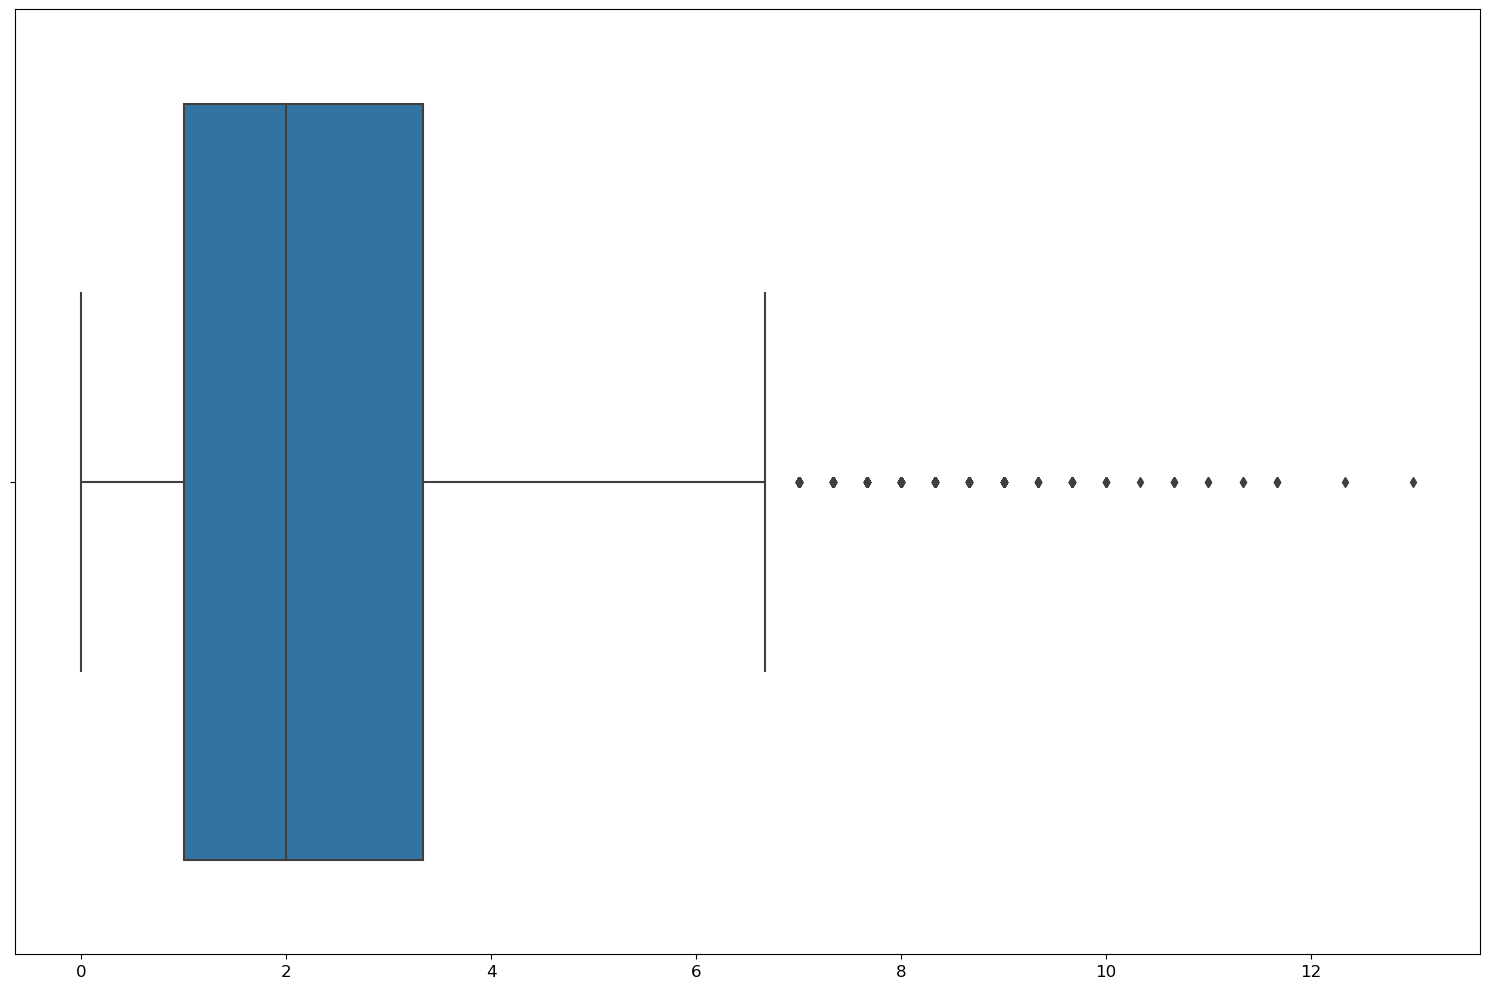

In [108]:
cd.plot_boxplot(df_train, 'madrid_wind_speed', univariate = True)

In [ ]:
cd.change_level(df_train, "bilbao_wind_deg", classes)

In [ ]:
df_train['bilbao_wind_deg'].value_counts()

In [ ]:
#fill null values in valencia pressure column with the mean value
valencia_pressure_mean =df_train['valencia_pressure'].mean()
df_train['valencia_pressure'].fillna(valencia_pressure_mean, inplace = True)

In [ ]:
#create the levels
levels = np.arange(950, 1050 +1, 4)

In [ ]:
#create an empty dictionary
pressure_dict = {}

In [ ]:
for i in range(len(levels) - 1):
    pressure_dict['sp' + str(i+1)] = [levels[i], levels[i+1]]

In [ ]:
#change the values for all the pressure columns in the train dataset to their respective categories
for column in df_train[[x for x in df_train.columns if 'pressure' in x and 'seville' not in x]].columns:
    change_level(df_train, column, pressure_dict)

In [ ]:
#change the values for all the pressure columns in the test dataset to their respective categories
for column in df_test[[x for x in df_test.columns if 'pressure' in x and 'seville' not in x]].columns:
    change_level(df_test, column, pressure_dict)

In [ ]:
snow_3h_train = df_train[[x for x in df_train.columns if 'snow_3h' in x]]

In [ ]:
snow_3h_test = df_test[[x for x in df_test.columns if 'snow_3h' in x]]

In [ ]:
def to_binary(dataframe, column_names = []):
    for column in column_names:
        #print(column)
        i = 0
        for row in dataframe[column]:
            if dataframe[column][i] > 0:
                dataframe.at[i, column] = 1
            else:
                dataframe.at[i, column] = 0
            i+= 1

In [ ]:
to_binary(df_train, snow_3h_train.columns)

In [ ]:
snow_3h_test.columns

In [ ]:
to_binary(df_test, snow_3h_test.columns)

In [ ]:
df_train[snow_3h_train.columns].value_counts()

In [ ]:
df_test[snow_3h_test.columns].value_counts()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
# look at data statistics
df_2.tail()

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

In [ ]:
df_train.to_csv('train_clean.csv', index = False, encoding='utf-8')
df_test.to_csv('test_clean.csv', index = False, encoding='utf-8')